# Preprare configs

This notebook supports the process of preparing config files.
The goals of the notebooks are as follows:
- extracting selected frame(s) from the video
- setting ant testing unwrapping parameters (camera view -> bird's eye view)

In [4]:
import sys
#sys.path.insert(0,'../..')
sys.path.insert(0,'..')

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pathlib 

import pickle
from moveoverlib.functions import *

%matplotlib inline

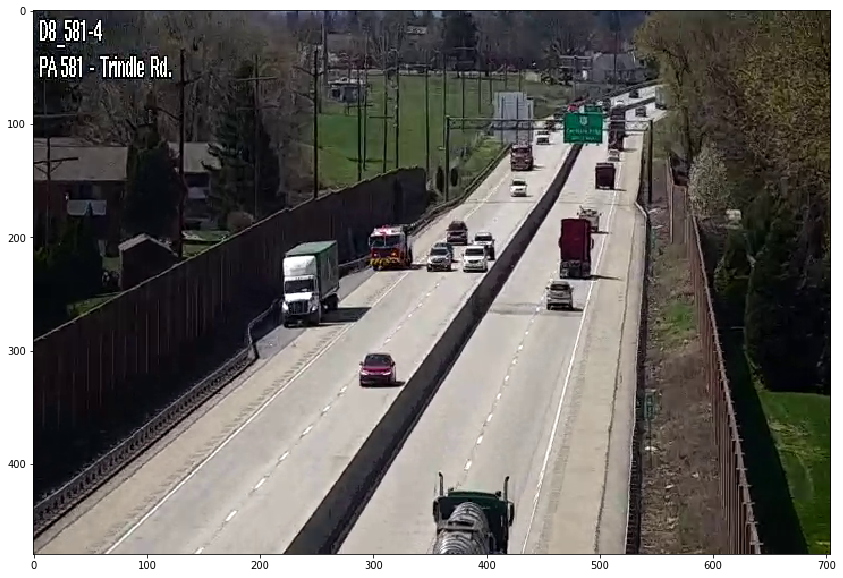

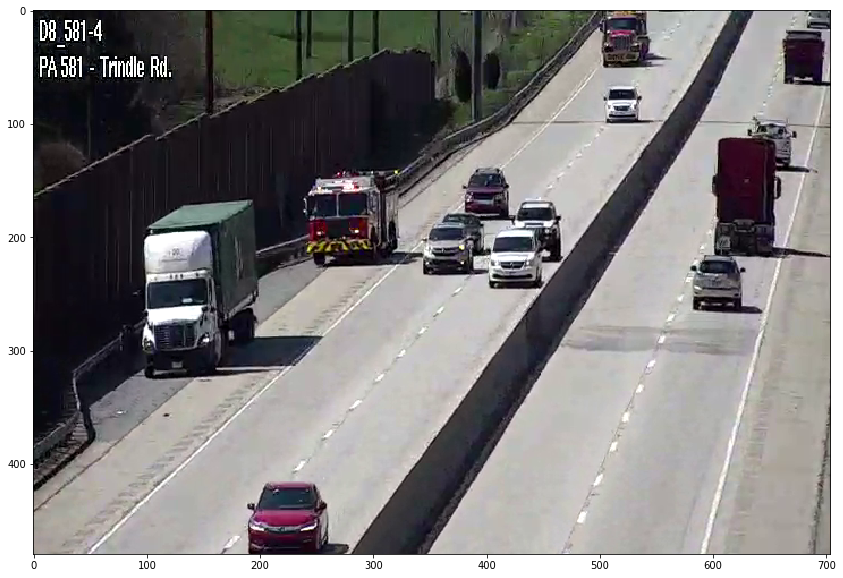

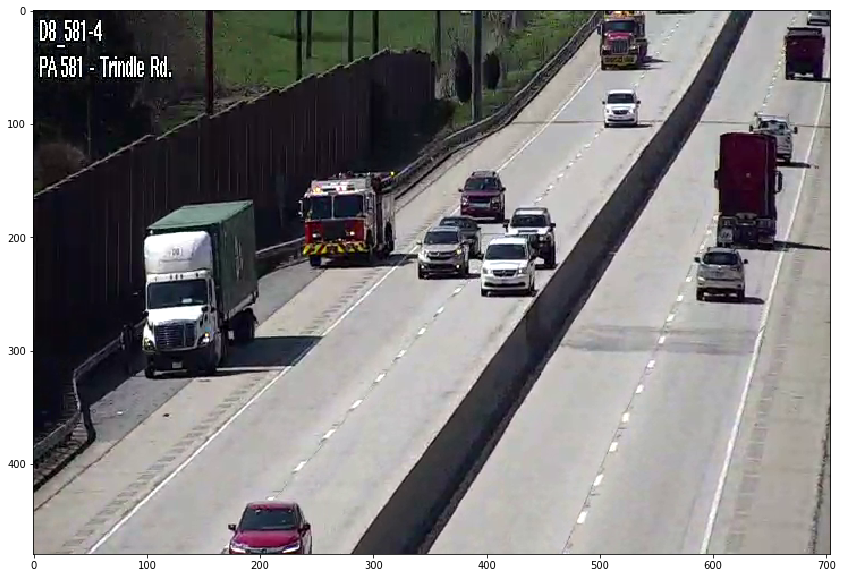

In [3]:
VIDEO_FILE = '/data/MoveOver/Videos/tmp/D8_581-4-2021-04-06 FHWA.mp4'

# Create folder for images
pathlib.Path('./images/').mkdir(parents=True, exist_ok=True)

# Extract frames
extractFrame(VIDEO_FILE, frameno = 16, dest_file = './images/frame_1.jpg');
extractFrame(VIDEO_FILE, frameno = 25, dest_file = './images/frame_2.jpg');
extractFrame(VIDEO_FILE, frameno = 28, dest_file = './images/frame_3.jpg');


Points for source (camera view) and destination (image view)
First four points are used for unwrapping, the rest is just display at tests

In [6]:
SRC = np.float32([
        [240,398],
        [378,245],
        [290,344],
        [538,330],
        [310,320],
                
        [38,356], 
    [267,369], 
    ])
DST = np.float32([
        [1046,333],
        [303,254],
        [834,310],
        [653,214],
        [729,300],        
                    
        [1035,394], 
    [936,322], 
])

print ('  "cameraPoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(SRC[0][0]), int(SRC[0][1]),
    int(SRC[1][0]), int(SRC[1][1]),
    int(SRC[2][0]), int(SRC[2][1]),
    int(SRC[3][0]), int(SRC[3][1])
))

print ('  "birdEyePoints" : [[{}, {}], [{}, {}], [{}, {}], [{}, {}]],'.format(
    int(DST[0][0]), int(DST[0][1]),
    int(DST[1][0]), int(DST[1][1]),
    int(DST[2][0]), int(DST[2][1]),
    int(DST[3][0]), int(DST[3][1]),
))



  "cameraPoints" : [[240, 398], [378, 245], [290, 344], [538, 330]],
  "birdEyePoints" : [[1046, 333], [303, 254], [834, 310], [653, 214]],


In [7]:
M = cv2.getPerspectiveTransform(SRC[:4], DST[:4])
Minv = cv2.getPerspectiveTransform(DST[:4], SRC[:4])

[240. 398.] -> [1046.  333.]
[378. 245.] -> [303. 254.]
[290. 344.] -> [834. 310.]
[538. 330.] -> [653. 214.]
[310. 320.] -> [725.9615  299.10315]
[ 38. 356.] -> [1045.2627  426.7956]
[267. 369.] -> [937.3541  321.16306]


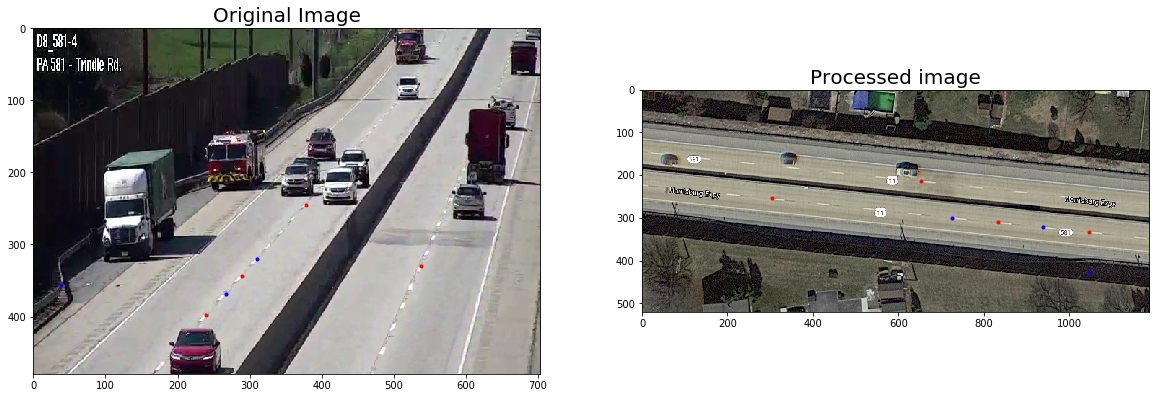

In [8]:
map_file = './images/skyview.PNG'
ret = displayPoints(SRC, M, './images/frame_2.jpg', map_file)

[1046.  333.] -> [240. 398.]
[303. 254.] -> [378. 245.]
[834. 310.] -> [290. 344.]
[653. 214.] -> [538. 330.]
[729. 300.] -> [308.0453 320.459 ]
[1035.  394.] -> [100.53894 365.93628]
[936. 322.] -> [264.81293 368.21484]


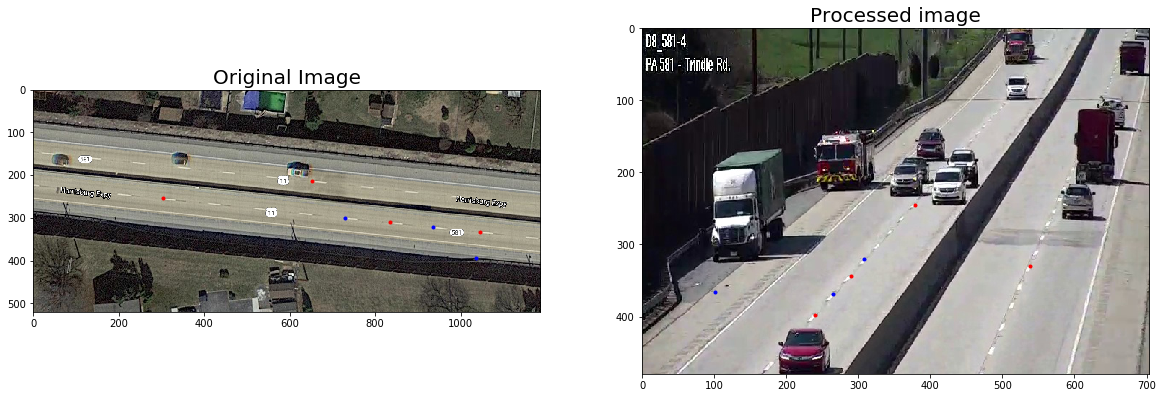

In [9]:
ret = displayPoints(DST, Minv, map_file,  './images/frame_2.jpg')

# Lane masks

In [34]:
MASK_PATH = './images/mask_amol.png'

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  87,  88,  89,  96,  97,  98,  99, 100, 105, 107, 108, 110,
        111, 120, 123, 124, 125, 129, 137, 138, 139, 141, 142, 143, 154,
        155, 156, 161, 169, 172, 173, 174, 175, 176, 178, 181, 190, 191,
        194]),
 array([274130,    140,     92,     80,     69,     57,     45,     55,
            43,     49,  23955,     87,     71,     46,     65,     53,
            46,     60,     51,     64,   3255,     63,     44,     46,
            52,     54,     46,     46,     49,     51,   4620,     51,
            61,     53,     47,     36, 

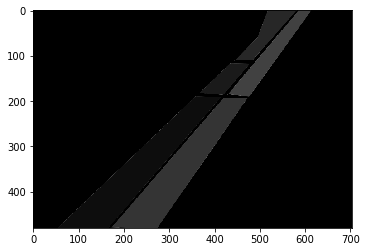

In [35]:


mask = (255*plt.imread(MASK_PATH)).astype(int)
if (len(mask.shape) == 3) and (mask.shape[2] > 1):
    #mask = np.sum(mask, axis=2)
    mask = mask[:, :, 0]
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

In [36]:
order = np.argsort(unique[1])[::-1]
unique_sorted = (unique[0][order], unique[1][order])
print (unique_sorted)

(array([  0,  10,  40,  50,  30,  20,   1,   2,  11,   3,  12,   4,  41,
        14,  19,  21,  52,  32,  17,  46,   5,   7,  25,  43,  51,  33,
        15,  42,  24,  31,  29,  18,  28,   9,  34,  44,  23,  13,  16,
        27,  26,   6,  22,  48,   8,  45,  38,  53,  39,  37,  54,  49,
        36,  35,  47,  55,  56,  60,  62,  57,  61,  65,  59,  58,  63,
        66,  64,  67,  76,  70,  87,  68, 156,  73, 123, 191,  98,  99,
       174, 105, 100,  77, 124, 125, 154, 143, 190,  71, 107, 155, 173,
       161, 169, 172, 141, 175, 176, 178, 181, 142, 110, 139,  89,  72,
        74,  75,  78,  79,  88,  96, 138,  97, 108, 111, 120, 129, 137,
       194]), array([274130,  23955,  21789,   7147,   4620,   3255,    140,     92,
           87,     80,     71,     69,     65,     65,     64,     63,
           62,     61,     60,     59,     57,     55,     54,     54,
           53,     53,     53,     52,     52,     51,     51,     51,
           49,     49,     47,     46,     46,     46

(array([ 0, 10, 20, 30, 40, 50]),
 array([277154,  23955,   3255,   4620,  21789,   7147]))

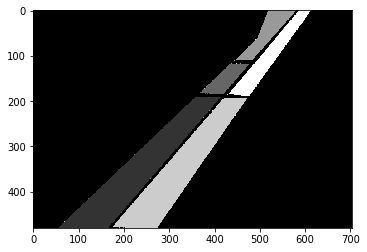

In [37]:
mask[~np.isin(mask, (10, 20, 30, 40, 50))] = 0
plt.imshow(mask, cmap='gray')
unique = np.unique(mask, return_counts=True)
unique

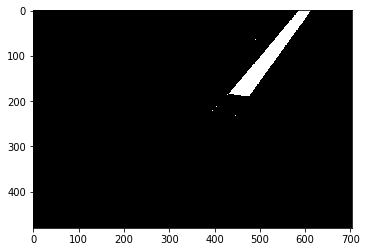

In [38]:
tmp = mask.copy()
tmp[tmp!=50] = 0
plt.imshow(tmp, cmap='gray')

In [ ]:
for i in np.unique(mask)[1:]:
    f = plt.figure()
    img = i * (mask == i)
    plt.imshow(img, cmap='gray')
    plt.title(i)